## Τεχνικές Εξόρυξης Δεδομένων - Εαρινό Εξάμηνο 2020-2021 2η Άσκηση
#### ΠΖΕΣΤΖΕΛΣΚΙ ΜΑΤΣΙΕΪ sdi1600136
#### ΧΑΡΑΛΑΜΠΗΣ ΑΡΗΣ sdi1600192

In [6]:
import numpy as np
import pandas as pd
import os
import csv
import nltk
import matplotlib.pyplot as plt

# Χρησιμοπoείται για inline plotting
%matplotlib inline 

In [7]:
pd.options.mode.chained_assignment = None 

### 0. Διάβασμα Dataset

In [9]:
true = r'D:/Desktop/University/Ergasies/2020-21/Ted/erg2_ted/True.csv'
fake = r'D:/Desktop/University/Ergasies/2020-21/Ted/erg2_ted/Fake.csv'

df_true = pd.read_csv(true)
df_fake = pd.read_csv(fake)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Desktop/University/Ergasies/2020-21/Ted/erg2_ted/True.cvs'

In [ ]:
n = 10

df_true = df_true.head(int(len(df_true)*(n/100)))

In [ ]:
df_fake = df_fake.head(int(len(df_fake)*(n/100)))

## 1. Προεπεξεργασία/καθάρισμα

Έλεγχος αν υπάρχουν γραμμές που έχουν null τιμές

In [ ]:
df_true.isnull().values.any()

False

In [ ]:
df_fake.isnull().values.any()

False

In [ ]:
from nltk.stem import WordNetLemmatizer 
import string

lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
# αφαίρεση σημείων στίξης

df_true['title'] = df_true['title'].str.replace('[^\.\w\s]', ' ')
df_true['text'] = df_true['text'].str.replace('[^\.\w\s]', ' ')

df_fake['title'] = df_fake['title'].str.replace('[^\.\w\s]', ' ')
df_fake['text'] = df_fake['text'].str.replace('[^\.\w\s]', ' ')

# τις τελείες τις αλλάζουμε ξεχωριστά για να διατηρήσουμε το U.S. US
df_true['title'] = df_true['title'].str.replace('.', '')
df_true['text'] = df_true['text'].str.replace('.', '')

df_fake['title'] = df_fake['title'].str.replace('.', '')
df_fake['text'] = df_fake['text'].str.replace('.', '')

In [ ]:
# tokenize

df_true['title'] = df_true.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
df_true['text'] = df_true.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

df_fake['title'] = df_fake.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
df_fake['text'] = df_fake.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [ ]:
# lemmatize

df_true['title'] = df_true['title'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
df_true['text'] = df_true['text'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

df_fake['title'] = df_fake['title'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
df_fake['text'] = df_fake['text'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

In [ ]:
# μετατροπή σε πεζά γράμματα

df_true['title'] = df_true['title'].apply(lambda x: [w.lower() for w in x])
df_true['text'] = df_true['text'].apply(lambda x: [w.lower() for w in x])

df_fake['title'] = df_fake['title'].apply(lambda x: [w.lower() for w in x])
df_fake['text'] = df_fake['text'].apply(lambda x: [w.lower() for w in x])

In [ ]:
# ένωση των λέξεων μιας σειράς σε ένα string

df_true['title'] = [' '.join(map(str, l)) for l in df_true['title']]
df_true['text'] = [' '.join(map(str, l)) for l in df_true['text']]

df_fake['title'] = [' '.join(map(str, l)) for l in df_fake['title']]
df_fake['text'] = [' '.join(map(str, l)) for l in df_fake['text']]

## 2. Μελέτη των δεδομένων

α. Οπτικοποίηση  των τίτλων με wordcloud

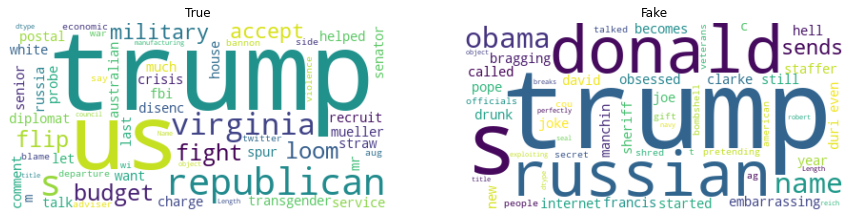

In [ ]:
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 12))

plt.axes(axes[0])
wordcloud = WordCloud(background_color = "white").generate(str(df_true['title']))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('True')

plt.axes(axes[1])
wordcloud = WordCloud(background_color = "white").generate(str(df_fake['title']))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Fake')

plt.show()

β. γραφήματα που να δείχνουν το μέσο όρο των χαρακτήρων

In [ ]:
# για αυτά τα ερωτήματα χρησιμοποιούμε τα δεδομένα πριν τη προεπεξεργασία
df_t = pd.read_csv(true)
df_f = pd.read_csv(fake)

n = 10

true_df = df_t.head(int(len(df_t)*(n/100)))
fake_df = df_f.head(int(len(df_f)*(n/100)))

Για τους τίτλους

In [ ]:
true_df['char_count'] = true_df['title'].str.len()
fake_df['char_count'] = fake_df['title'].str.len()

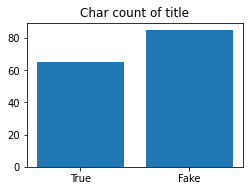

In [ ]:
total = true_df['char_count'].sum()
avrg = total / true_df.shape[0]

total2 = fake_df['char_count'].sum()
avrg2 = total2 / fake_df.shape[0]

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
ax.set_title('Char count of title')
langs = ['True', 'Fake']
average = [avrg,avrg2]
ax.bar(langs,average)

plt.show()

Για τα κείμενα

In [ ]:
true_df['char_count_txt'] = true_df['text'].str.len()
fake_df['char_count_txt'] = fake_df['text'].str.len()

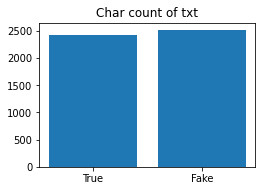

In [ ]:
total = true_df['char_count_txt'].sum()
avrg = total / true_df.shape[0]

total2 = fake_df['char_count_txt'].sum()
avrg2 = total2 / fake_df.shape[0]

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
ax.set_title('Char count of txt')
langs = ['True', 'Fake']
average = [avrg,avrg2]
ax.bar(langs,average)
plt.show()

γ. κατανομή του αριθμού των λέξεων

υπολογίσαμε το μέσο όρο των αριθμών των λέξεων για το true και false αντίστοιχα

In [ ]:
true_df['word_count'] = true_df['title'].apply(lambda x: len(x.split()) )
fake_df['word_count'] = fake_df['title'].apply(lambda x: len(x.split()) )

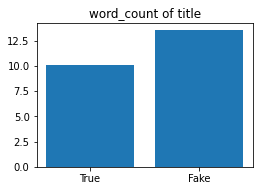

In [ ]:
total = true_df['word_count'].sum()
avrg = total / true_df.shape[0]

total2 = fake_df['word_count'].sum()
avrg2 = total2 / fake_df.shape[0]

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
ax.set_title('word_count of title')
langs = ['True', 'Fake']
average = [avrg,avrg2]
ax.bar(langs,average)
plt.show()

In [ ]:
true_df['word_count_txt'] = true_df['text'].apply(lambda x: len(x.split()) )
fake_df['word_count_txt'] = fake_df['text'].apply(lambda x: len(x.split()) )

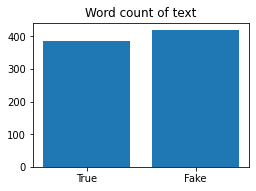

In [ ]:
total = true_df['word_count_txt'].sum()
avrg = total / true_df.shape[0]

total2 = fake_df['word_count_txt'].sum()
avrg2 = total2 / fake_df.shape[0]

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
ax.set_title('Word count of text')
langs = ['True', 'Fake']
average = [avrg,avrg2]
ax.bar(langs,average)
plt.show()


δ. κατανομή του αριθμού των λέξεων χωρίς stopwords

In [ ]:
# remove stopwords
stop = stopwords.words('english')

true_df['title'] = true_df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
true_df['text'] = true_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

fake_df['title'] = fake_df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
fake_df['text'] = fake_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
true_df['word_count2'] = true_df['title'].apply(lambda x: len(x.split()) )
fake_df['word_count2'] = fake_df['title'].apply(lambda x: len(x.split()) )

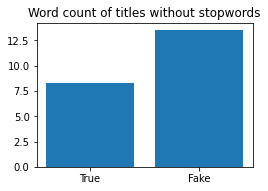

In [ ]:
total = true_df['word_count2'].sum()
avrg = total / true_df.shape[0]

total2 = fake_df['word_count2'].sum()
avrg2 = total2 / fake_df.shape[0]

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
ax.set_title('Word count of titles without stopwords')
langs = ['True', 'Fake']
average = [avrg,avrg2]
ax.bar(langs,average)
plt.show()

In [ ]:
true_df['word_count_txt2'] = true_df['text'].apply(lambda x: len(x.split()) )
fake_df['word_count_txt2'] = fake_df['text'].apply(lambda x: len(x.split()) )

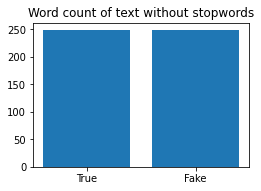

In [ ]:
total = true_df['word_count_txt2'].sum()
avrg = total / true_df.shape[0]

total2 = fake_df['word_count_txt2'].sum()
avrg2 = total2 / fake_df.shape[0]

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
ax.set_title('Word count of text without stopwords')
langs = ['True', 'Fake']
average = [avrg,avrg2]
ax.bar(langs,average)
plt.show()

ε. Τα 10 πιο συχνά  bigrams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words = stop, ngram_range = (2,2))

# Bigrams of true titles

# matrix of bigrams
bigrams = vec.fit_transform(true_df['title'])

# count frequency of bigrams
count_values = bigrams.toarray().sum(axis=0)

# list of bigrams
vocab = vec.vocabulary_
df_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()],reverse = True)).rename(columns={0: 'Frequency', 1:'Bigrams of true titles'})

<AxesSubplot:xlabel='Bigrams of true titles'>

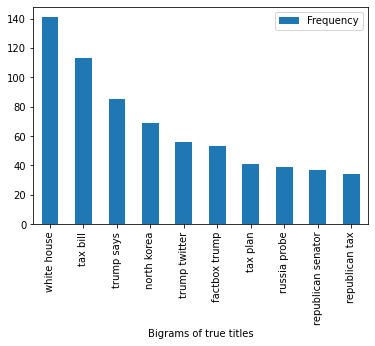

In [ ]:
df_bigram[:10].plot.bar('Bigrams of true titles')

In [ ]:
# Bigrams of true text
bigrams = vec.fit_transform(true_df['text'])

count_values = bigrams.toarray().sum(axis=0)

vocab = vec.vocabulary_
df2_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()],        reverse=True)).rename(columns={0: 'Frequency', 1:'Bigrams of true text'})

<AxesSubplot:xlabel='Bigrams of true text'>

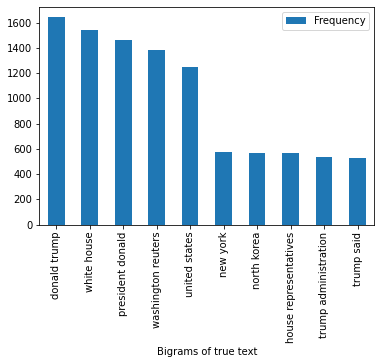

In [ ]:
df2_bigram[:10].plot.bar('Bigrams of true text')

In [ ]:
# Bigrams of fake title
bigrams = vec.fit_transform(fake_df['title'])

count_values = bigrams.toarray().sum(axis=0)

vocab = vec.vocabulary_
df3_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()],        reverse=True)).rename(columns={0: 'Frequency', 1:'Bigrams of fake title'})

<AxesSubplot:xlabel='Bigrams of fake title'>

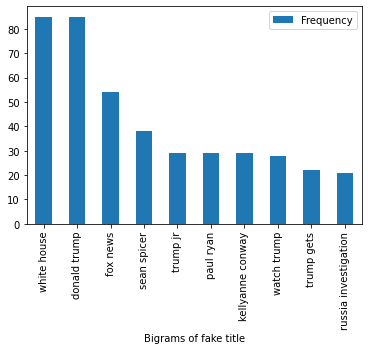

In [ ]:
df3_bigram[:10].plot.bar('Bigrams of fake title')

In [ ]:
# Bigrams of fake text
bigrams = vec.fit_transform(fake_df['text'])

count_values = bigrams.toarray().sum(axis=0)

vocab = vec.vocabulary_
df4_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()],        reverse=True)).rename(columns={0: 'Frequency', 1:'Bigrams of fake text'})

<AxesSubplot:xlabel='Bigrams of fake text'>

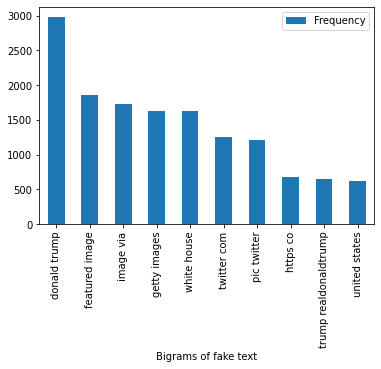

In [ ]:
df4_bigram[:10].plot.bar('Bigrams of fake text')

## 3. Δημιουργία συνόλου εκμάθησης και δοκιμής

In [ ]:
#remove stop words
df_true['title'] = df_true['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_true['text'] = df_true['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

df_fake['title'] = df_fake['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_fake['text'] = df_fake['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
# προσθήκη του label 1 για τα true και 0 φια τα fake
df_true['label'] = 1
df_fake['label'] = 0

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# κανουμε το διαχωρισμο των δεδομένων για το καθενα ξεχωριστά και μετά τα ενώνουμε
train, test = train_test_split (df_true, test_size = 0.2, random_state = 42, shuffle = True)
train2, test2 = train_test_split (df_fake, test_size = 0.2, random_state = 42, shuffle = True)

df_train = pd.concat([train, train2])
df_test = pd.concat([test, test2])

In [ ]:
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [ ]:
# αποθήκευση σε αρχεια
df_train.to_csv("train.csv", index=False)
df_test.to_csv("test.csv", index=False)

In [ ]:
train_txt = df_train['text']
train_label = df_train['label']

test_txt = df_test['text']
test_label = df_test['label']

## Υλοποίηση Κατηγοριοποίησης

Bag-of-Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_df = 1.0, min_df = 1, max_features = 1000, stop_words = 'english')

train_features = vect.fit_transform(train_txt)

test_features = vect.fit_transform(test_txt)

tfidf transform

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect2 = TfidfVectorizer(max_df = 1.0, min_df = 1, max_features = 1000, stop_words = 'english')

train_tfidf_features = vect2.fit_transform(train_txt)

test_tfidf_features = vect2.fit_transform(test_txt)

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

BoW LogisticRegression

In [ ]:
logistic_model = LogisticRegression()

logistic_model = logistic_model.fit(train_features,train_label)

prediction = logistic_model.predict(test_features)

In [ ]:
from sklearn.metrics import f1_score

accuracy = logistic_model.score(test_features, test_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))


accuracy =  66.51835372636262 %
f1 score =  0.6323434490008247


TFIDF LogisticRegression

In [ ]:
logistic_model = LogisticRegression()

logistic_model.fit(train_tfidf_features,train_label)

prediction = logistic_model.predict(test_tfidf_features)

In [ ]:
accuracy = logistic_model.score(test_tfidf_features, test_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score( test_label, prediction, average = 'weighted') )

accuracy =  58.39822024471635 %
f1 score =  0.5120952185600014


 ### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

 BoW Naive Bayes

In [ ]:
nb_model = MultinomialNB()

nb_model = nb_model.fit(train_features,train_label)

prediction = nb_model.predict(test_features)

In [ ]:
accuracy = nb_model.score(test_features, test_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  63.73748609566184 %
f1 score =  0.5875517945751142


TFIDF Naive Bayes

In [ ]:
nb_model = MultinomialNB()

nb_model = nb_model.fit(train_tfidf_features, train_label)

prediction = nb_model.predict(test_tfidf_features)

In [ ]:
accuracy = nb_model.score(test_tfidf_features, test_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  63.29254727474972 %
f1 score =  0.6033993852626623


### Support Vector Machines (SVM)

In [ ]:
from sklearn import svm

BoW SVM

In [ ]:
svm_model = svm.SVC(kernel = 'linear', C = 1, probability = True)

svm_model = svm_model.fit(train_features,train_label)

prediction = svm_model.predict(test_features)

In [ ]:
accuracy = svm_model.score(test_features, test_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  62.736373748609566 %
f1 score =  0.5844049176238237


TFIDF SVM

In [ ]:
svm_model = svm.SVC(kernel = 'linear', C = 1, probability = True)

svm_model = svm_model.fit(train_tfidf_features,train_label)

prediction = svm_model.predict(test_tfidf_features)

In [ ]:
accuracy = svm_model.score(test_tfidf_features, test_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  58.175750834260285 %
f1 score =  0.5143729352914569


### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

BoW of Random Forests

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model = rf_model.fit(train_features,train_label)

prediction = rf_model.predict(test_features)

In [ ]:
accuracy = rf_model.score(test_features, test_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  53.281423804226925 %
f1 score =  0.3899780620442467


TFIDF of Random Forests

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model = rf_model.fit(train_tfidf_features,train_label)

prediction = rf_model.predict(test_tfidf_features)

In [ ]:
accuracy = rf_model.score(test_tfidf_features, test_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  53.83759733036707 %
f1 score =  0.4032032660714981


### Word2vec

In [ ]:
#tokens = [txt.split() for txt in train_txt]
tokens = df_train.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
tokens2 = df_test.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [ ]:
import gensim
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-100")

In [ ]:
train_embed = []

for token in tokens:
    word_vectors = np.array([model[word] for word in token if word in model.index_to_key])
    train_embed.append(word_vectors.mean(axis=0))
    
train_embed = np.array(train_embed)

In [ ]:
test_embed = []

for token in tokens2:
    word_vectors = np.array([model[word] for word in token if word in model.index_to_key])
    test_embed.append(word_vectors.mean(axis=0))
    
test_embed = np.array(test_embed)

LogisticRegression

In [ ]:
logistic_model = LogisticRegression()

logistic_model.fit(train_embed,train_label)

prediction = logistic_model.predict(test_embed)

In [ ]:
accuracy = logistic_model.score(train_embed, train_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  96.32311977715877 %
f1 score =  0.9577385655975169


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model = nb_model.fit(train_embed,train_label)

prediction = nb_model.predict(test_embed)

In [ ]:
accuracy = nb_model.score(train_embed, train_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  91.75487465181058 %
f1 score =  0.9254993387513317


SVM

In [ ]:
svm_model = svm.SVC(kernel = 'linear', C = 1, probability = True)

svm_model = svm_model.fit(train_embed,train_label)

prediction = svm_model.predict(test_embed)

In [ ]:
accuracy = svm_model.score(train_embed, train_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  97.3259052924791 %
f1 score =  0.9666382724400735


Random Forests 

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model = rf_model.fit(train_embed,train_label)

prediction = rf_model.predict(test_embed)

In [ ]:
accuracy = rf_model.score(train_embed, train_label)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_label, prediction, average = 'weighted'))

accuracy =  100.0 %
f1 score =  0.9532899935551502


## Beat the Benchmark (bonus)
Στη μέθοδο LogisticRegression λαμβάνουμε υπόψη και τους τίτλους 

Bow    accuracy     :  66.52% -> 69.85%


Tfidf accuracy :  58.40% -> 74.52%

In [ ]:
train = r'D:/Desktop/erg2_ted/train.csv'
test = r'D:/Desktop/erg2_ted/test.csv'

train_df = pd.read_csv(train)
test_df = pd.read_csv(test)

In [ ]:
train_df['title_txt'] = train_df['title'] + train_df['text']
test_df['title_txt'] = test_df['title'] + test_df['text']

In [ ]:
train_mixed = train_df['title_txt']
train_lbl = train_df['label']

test_mixed = test_df['title_txt']
test_lbl = test_df['label']

In [ ]:
# BagOfWords
vect = CountVectorizer(max_df = 1.0, min_df = 1, max_features = 1000, stop_words = 'english')

train_feat = vect.fit_transform(train_mixed)

test_feat = vect.fit_transform(test_mixed)

In [ ]:
# Tfidf
vect2 = TfidfVectorizer(max_df = 1.0, min_df = 1, max_features = 1000, stop_words = 'english')

train_tfidf_feat = vect2.fit_transform(train_mixed)

test_tfidf_feat = vect2.fit_transform(test_mixed)

In [ ]:
log_model = LogisticRegression()

log_model = log_model.fit(train_feat, train_lbl)

prediction = log_model.predict(test_feat)

In [ ]:
accuracy = log_model.score(test_feat, test_lbl)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_lbl, prediction, average = 'weighted'))

accuracy =  69.85539488320356 %
f1 score =  0.6977160741840432


In [ ]:
log_model = LogisticRegression()

log_model = log_model.fit(train_tfidf_feat,train_lbl)

prediction = log_model.predict(test_tfidf_feat)

In [ ]:
accuracy = log_model.score(test_tfidf_feat, test_lbl)

print("accuracy = ", accuracy * 100, "%")

print("f1 score = ", f1_score(test_lbl, prediction, average = 'weighted'))

accuracy =  74.52725250278087 %
f1 score =  0.7399717882134286
